In [120]:
import numpy as np
import cv2
from skimage.measure import compare_ssim as ssim
from matplotlib import pyplot as plt
import pywt
import os
import sys
import scipy.io

Convolution filter from Task3

In [121]:
def convo(img,filter1,dim):
    s=np.zeros(dim*dim)
    l=0
    r=np.zeros((3,3))
    for i in range(0,dim-2):
        for j in range(0,dim-2):
            a1 =img[i,j]
            a2 =img[i,j+1]
            a3 =img[i,j+2]
            a4 =img[i+1,j]
            a5 =img[i+1,j+1]
            a6 =img[i+1,j+2]
            a7 =img[i+2,j]
            a8 =img[i+2,j+1]
            a9 =img[i+2,j+2]
            k=np.array([[a1,a2,a3],[a4,a5,a6],[a7,a8,a9]])
        
            r=np.multiply(k,filter1)
            s[l]=np.sum(r)
            l=l+1
    z=np.reshape(s,(dim,dim))     
    return z

In [122]:
def mini_l0_norm(A,y):    
    x = np.zeros((A.shape[1], 1))
    residue = y
    
    while np.linalg.norm(residue) > 1.6:

        #Projection coefficients of residue on columns of A
        column_norms = np.linalg.norm(A, axis = 0, ord = 2).reshape(-1,1)
    
        #projection_coeffs = np.divide(A.T @ residue , column_norms)
        projection_coeffs = A.T @ residue
        #minimum difference coefficient
        #print(A.shape, residue.shape, projection)
        #min_norm_coeff, min_norm_ind = min_norm(A, residue, projection_coeffs)
        
        key_coeff = np.argmax((projection_coeffs), axis = 0)
        max_coeff = projection_coeffs[key_coeff]
        
        #Updating residue
        residue = residue - max_coeff * A[:, key_coeff]
        
        #Assigning to x
        x[key_coeff] += max_coeff
        
    return x

In [123]:
im = cv2.imread('Barbara.png',0)

    

Interpolation

In [124]:
def res(im):
    x=0
    y=0
    arr=np.zeros((128,128))
    for n in range(63):
        y=0
        x=x+2
        for m in range(63):
            arr[y][x]=im[m][n]
            arr[y][x+1]=im[m][n]
            y=y+1
            arr[y][x]=im[m][n]
            arr[y][x+1]=im[m][n]
            y=y+1
    return arr

In [125]:
image=res(im)

In [126]:
filter1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
filter2=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [127]:
horizontal1=convo(image,filter1,128)

In [128]:
vertical1=convo(image,filter2,128)

In [129]:
horizontal2=convo(horizontal1,filter1,128)

In [130]:
vertical2=convo(vertical1,filter2,128)

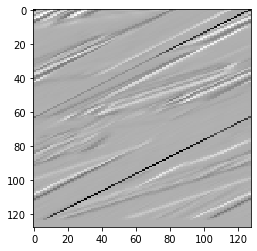

In [131]:
plt.imshow(horizontal1,'gray')

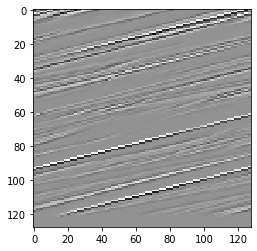

In [132]:
plt.imshow(horizontal2,'gray')

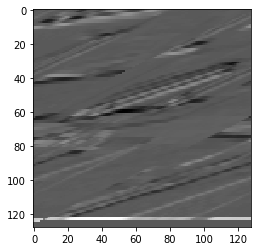

In [133]:
plt.imshow(vertical1,'gray')

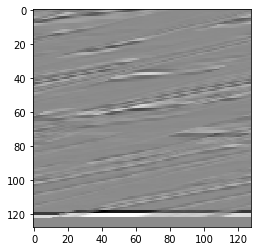

In [134]:
plt.imshow(vertical2,'gray')

In [135]:
x=range(0,128)

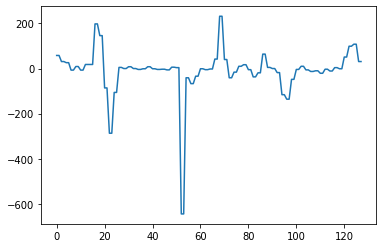

In [136]:
plt.plot(x,horizontal1[100,:])

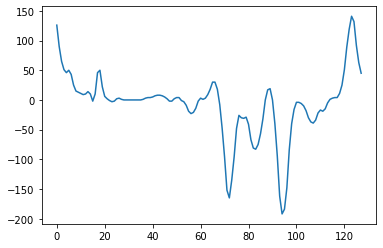

In [137]:
plt.plot(x,vertical1[100,:])


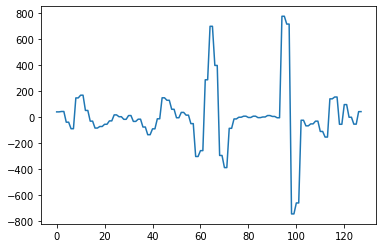

In [138]:
plt.plot(x,horizontal2[100,:])

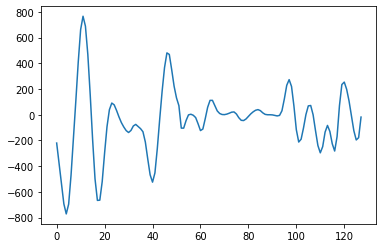

In [139]:
plt.plot(x,vertical2[100,:])

Now to Generate a sparse representation for every 5 × 5 patch using the dictionary Dl, we first divide our image to multiple 5*5 patches .
we define a variable matrix to store the patch
We access all patches using double for loops
And then for each patch we take take first order derivate(horizontal and vertical), second order derivative(vertical and horizontal).
Then we stack then together in variable pics
Then we finally generate our sparse representation using the code/algorithm use in 1st and 2nd task.
All the sparse vectors are stored in variable o
which finally has a dimesion of (512,625)


In [140]:
variables = scipy.io.loadmat('Dictionary.mat')

In [141]:
d=variables['Dl']

In [155]:
pic=np.zeros((5,5))

In [156]:
vineeth=np.zeros((512))

In [157]:
o=np.zeros((25,25,512))

In [158]:
o=o.reshape(625,512)
o=o.transpose()

In [164]:
pics=np.zeros((100,1))
for i in range(0,25):
    for j in range(0,25):
        k=i*5
        l=j*5
        pic=image[k:k+5][l:l+5]
        h1=convo(pic,filter1,5)
        v1=convo(pic,filter2,5)
        h2=convo(pic,filter1,5)
        v2=convo(pic,filter2,5)
        pics[0:25,0]=h1.resize((25,1))
        pics[25:50,0]=h2.resize((25,1))
        pics[50:75,0]=v1.resize((25,1))
        pics[75:100,0]=v2.resize((25,1))
        vineeth=mini_l0_norm(d,pics)
        print(vineeth)
        o[:,i*25+j]=vineeth
        
        
        
        
                                              
                                              
                                              



  

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

ValueError: could not broadcast input array from shape (512,1) into shape (512)

In [166]:
vineeth.shape

(512, 1)

In [165]:
o.shape

(512, 625)